# Proyecto de Análisis de Datos: Brecha de Género en STEM con Python

## Introducción
¿Sabías que, en el ámbito de Ciencia, Tecnología, Ingeniería y Matemáticas (STEM), la participación de las mujeres es menor en comparación con la de los hombres?

Esta brecha de género en STEM tiene un impacto negativo en la sociedad, ya que limita el potencial de desarrollo e innovación al excluir a las mujeres de estas áreas tan importantes.

### ¿Por qué existe esta brecha?

Diversos factores contribuyen a esta disparidad, entre ellos:

*   **Estereotipos de género:** Desde la infancia, se nos inculcan ideas preconcebidas sobre las carreras consideradas "para hombres" o "para mujeres", lo que desalienta a las niñas a optar por carreras STEM.
*   **Cultura y ambiente laboral:** En algunos casos, las mujeres pueden enfrentar discriminación o acoso en entornos laborales STEM, dificultando su desarrollo profesional.
*   **Disparidades en el acceso a la educación y recursos:** Las niñas y mujeres de origen hispano o de países en desarrollo pueden tener menos oportunidades para acceder a una educación STEM de calidad.

Además de los factores mencionados, es fundamental analizar datos específicos que nos permitan comprender mejor los desafíos que enfrenta la equidad en STEM.

El proyecto "Inequality in STEM" recopila información valiosa sobre aspectos clave como la edad, el género, el origen hispano, el lugar de nacimiento, la raza, la disciplina STEM, la ocupación y el estado de nacimiento. Estos datos provienen de la Encuesta de la Comunidad Americana de 2013 y están disponibles en Kaggle.

## Objetivos
Este proyecto tiene como propósito desarrollar un modelo de aprendizaje automático para identificar y comprender las causas principales de la brecha de género en STEM. Utilizaremos gráficos intuitivos y técnicas de machine learning aplicadas a los datos recopilados.

El modelo buscará responder preguntas clave, y complementaremos nuestras respuestas con visualizaciones:

1. **¿Cómo influye el origen hispano en la participación en carreras STEM?**
   - Analizaremos la participación en STEM en relación con el origen hispano.
   - Mediremos la participación de diferentes grupos hispanos en carreras STEM, revelando patrones y tendencias significativas.

2. **¿Existen disparidades de género significativas en la población hispana en STEM?**
   - Examinaremos la distribución de género en la participación hispana en carreras STEM.
   - Identificaremos posibles desequilibrios de género entre hombres y mujeres en campos STEM, destacando disparidades.

3. **¿Cómo varía la brecha de género en STEM con diferentes grupos de edad?**
   - Analizaremos la evolución de la brecha de género en carreras STEM en diferentes grupos de edad.
   - Identificaremos patrones de cambio en la participación de hombres y mujeres a medida que avanzan en sus carreras.

4. **¿Existen diferencias notables en la participación de géneros en STEM según la edad?**
   - Investigaremos posibles variaciones en la participación de hombres y mujeres en carreras STEM en relación con la edad.
   - Identificaremos diferencias significativas en la distribución de género a lo largo de la trayectoria educativa y profesional.
   
5. **¿Se observan patrones significativos de inequidad de género en STEM en grupos raciales específicos?**
   - Investigaremos la existencia de patrones notables de inequidad de género en campos STEM dentro de grupos raciales específicos.
   - Identificaremos posibles disparidades en la participación de hombres y mujeres en STEM en contextos raciales específicos.

El objetivo final de este proyecto es implementar estrategias efectivas que reduzcan significativamente la brecha de género en el campo de STEM. Buscamos promover la equidad de oportunidades y maximizar el potencial de todas las personas en STEM, contribuyendo así a un futuro más inclusivo e innovador en estas disciplinas.



In [ ]:
# Paso 1: Importar Bibliotecas
# ---------------------------------------------------------
import numpy as np  # Biblioteca para operaciones matemáticas.
import pandas as pd  # Biblioteca para manipulación y análisis de datos.
import seaborn as sns  # Biblioteca para visualización de datos basada en Matplotlib.
import matplotlib.pyplot as plt  # Biblioteca para visualizaciones.
from sklearn.linear_model import LogisticRegression  # Algoritmo de regresión logística de scikit-learn.
#sirve para generar dataset aleatorios from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split #sirve para realizar las particiones

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Paso 2: Definir las columnas más relevantes para el análisis
# ---------------------------------------------------------
columnas_relevantes = ['AGEP', 'SEX', 'HISP', 'POBP', 'RAC1P', 'SCIENGP', 'SOCP']

In [ ]:
# Paso 3: Cargar datos desde el archivo CSV
# -----------------------------------------

# En este paso, cargamos datos relevantes desde un archivo CSV.
# Utilizamos la función concat para unir dos lecturas del mismo archivo, asegurándonos de tener todas las columnas necesarias.

# Ruta del archivo CSV
archivo_csv = "/content/drive/MyDrive/Proyecto_modulo2/STEMinismo/Dataset/ss13pusa.csv"

# Realizamos dos lecturas del archivo CSV y seleccionamos solo las columnas relevantes.
df_stem = pd.concat([
    pd.read_csv(archivo_csv, usecols=columnas_relevantes),
    pd.read_csv(archivo_csv, usecols=columnas_relevantes)
])

# No necesitamos un índice personalizado en este contexto, ya que nos enfocamos en manipular datos a través de columnas específicas.
# Esta elección simplifica la estructura de los datos, facilitando su comprensión y análisis.

In [ ]:
# Paso 4: Mapeo de Códigos de Estado a Nombres de Estado
# ----------------------------------------------------

# En este paso, creamos un diccionario que relaciona los códigos de estado con los nombres de los estados.
# Este diccionario será útil para reemplazar los códigos numéricos con nombres más comprensibles.

# Diccionario que asigna códigos de estado a nombres de estado:
codigo_a_estado = {
    1: "Alabama",
    2: "Alaska",
    4: "Arizona",
    5: "Arkansas",
    6: "California",
    8: "Colorado",
    9: "Connecticut",
    10: "Delaware",
    11: "District_of_Columbia",
    12: "Florida",
    13: "Georgia",
    15: "Hawaii",
    16: "Idaho",
    17: "Illinois",
    18: "Indiana",
    19: "Iowa",
    20: "Kansas",
    21: "Kentucky",
    22: "Louisiana",
    23: "Maine",
    24: "Maryland",
    25: "Massachusetts",
    26: "Michigan",
    27: "Minnesota",
    28: "Mississippi",
    29: "Missouri",
    30: "Montana",
    31: "Nebraska",
    32: "Nevada",
    33: "New_Hampshire",
    34: "New_Mexico",
    35: "New_Jersey",
    36: "New_York",
    37: "North_Carolina",
    38: "North_Dakota",
    39: "Ohio",
    40: "Oklahoma",
    41: "Oregon",
    42: "Pennsylvania",
    44: "Rhode_Island",
    45: "South_Carolina",
    46: "South_Dakota",
    47: "Tennessee",
    48: "Texas",
    49: "Utah",
    50: "Vermont",
    51: "Virginia",
    53: "Washington",
    54: "West_Virginia",
    55: "Wisconsin",
    56: "Wyoming"
}

In [ ]:
# Paso 5: Renombrar las Columnas
# -------------------------------

# En este paso, estamos cambiando los nombres de las columnas para que sean más descriptivos y fáciles de entender.

# Diccionario de mapeo de nombres antiguos a nuevos:
mapeo_nombres = {
    'AGEP': 'Edad',                   # Renombrar 'AGEP' a 'Edad' para representar la edad.
    'SEX': 'Género',                  # Renombrar 'SEX' a 'Género' para indicar la variable de género.
    'HISP': 'Origen_Hispano',         # Renombrar 'HISP' a 'Origen_Hispano' para identificar el origen hispano.
    'POBP': 'Lugar_Nacimiento',       # Renombrar 'POBP' a 'Lugar_Nacimiento' para reflejar el lugar de nacimiento.
    'RAC1P': 'Raza',                  # Renombrar 'RAC1P' a 'Raza' para representar la variable de raza.
    'SCIENGP': 'Ciencia_Tecnologia',  # Renombrar 'SCIENGP' a 'Ciencia_Tecnologia' para clarificar la disciplina.
    'SOCP': 'Ocupacion',              # Renombrar 'SOCP' a 'Ocupacion' para identificar la ocupación.
    'Estado': 'Estado_Nacimiento'     # Renombrar 'Estado' a 'Estado_Nacimiento' para indicar el estado de nacimiento.
}
# Aplicamos el mapeo de nombres al DataFrame:
df_stem.rename(columns=mapeo_nombres, inplace=True)

In [ ]:
# Paso 6: Recodificar la Variable de Género
# ----------------------------------------

# En este paso, realizamos la recodificación de la variable de género para adaptarla a modelos de regresión.
# La codificación original usaba 1 para masculino y 2 para femenino, pero en modelos de regresión, preferimos una codificación binaria (0 y 1).

# Verificar si la variable ya ha sido recodificada previamente:
if np.min(df_stem['Género']) > 0:
    # Restamos 1 a todos los valores de 'Género' si aún no ha sido recodificada.
    df_stem['Género'] = df_stem['Género'] - 1
    # Creamos una nueva columna llamada 'sexo_recodificado' con etiquetas 'Hombre' y 'Mujer'.
    mapeo_genero = {0: "Hombre", 1: "Mujer"}
    df_stem['sexo_recodificado'] = df_stem['Género'].map(mapeo_genero)

# Realizamos la recodificación:
# - Cambiamos el valor 1 a 0, representando la categoría masculina.
# - Cambiamos el valor 2 a 1, representando la categoría femenina.

# Paso 7: Visualizar los primeros registros del DataFrame
# -------------------------------------------------------

# Mostramos los primeros 20 registros del DataFrame para brindar una vista previa de los datos.
print("Primeros 20 registros del DataFrame:")
df_stem.head(20)

Primeros 20 registros del DataFrame:


,Edad,Género,Origen_Hispano,Lugar_Nacimiento,Raza,Ciencia_Tecnologia,Ocupacion,sexo_recodificado
0,19,1,1,28,1,NaN,NaN,Mujer
1,55,1,1,1,2,NaN,411011,Mujer
2,56,0,1,1,2,NaN,493050,Hombre
3,21,0,1,1,2,NaN,NaN,Hombre
4,21,1,1,1,2,NaN,NaN,Mujer
5,63,1,1,1,2,2.0,252020,Mujer
6,61,1,1,1,3,NaN,NaN,Mujer
7,20,0,1,1,3,NaN,472061,Hombre
8,12,0,1,1,3,NaN,NaN,Hombre
9,78,1,1,1,2,NaN,519061,Mujer


In [ ]:
# Paso 8: Recodificar la Variable de Raza
# ---------------------------------------

# Simplificamos las categorías de la variable de raza para facilitar el análisis.
# Las nuevas categorías son 'Hispano', 'Blanco', 'Negro', 'Asiático' y 'Otro'.

# Definimos una función, 'recodificar_raza':
# - Asigna a cada individuo una categoría de raza según las nuevas especificaciones.
def recodificar_raza(row):
    if row['Origen_Hispano'] > 1:
        return "Hispano"
    elif row['Raza'] == 1:
        return "Blanco"
    elif row['Raza'] == 2:
        return "Negro"
    elif row['Raza'] == 6:
        return "Asiático"
    else:
        return "Otro"

# Paso 9: Aplicar la Recodificación de la Variable de Raza
# --------------------------------------------------------

# Aplicamos la función 'recodificar_raza' a cada fila del DataFrame.
# Creamos una nueva columna llamada 'raza_recodificada' que almacena las categorías de raza según las nuevas especificaciones.

df_stem['raza_recodificada'] = df_stem.apply(recodificar_raza, axis=1)

# Paso 10: Visualizar los primeros registros del DataFrame
# -------------------------------------------------------

# Mostramos los primeros 20 registros del DataFrame después de la recodificación de la raza.
print("Primeros 20 registros del DataFrame después de recodificar la raza:")
df_stem.head(20)

Primeros 20 registros del DataFrame después de recodificar la raza:


,Edad,Género,Origen_Hispano,Lugar_Nacimiento,Raza,Ciencia_Tecnologia,Ocupacion,sexo_recodificado,raza_recodificada
0,19,1,1,28,1,NaN,NaN,Mujer,Blanco
1,55,1,1,1,2,NaN,411011,Mujer,Negro
2,56,0,1,1,2,NaN,493050,Hombre,Negro
3,21,0,1,1,2,NaN,NaN,Hombre,Negro
4,21,1,1,1,2,NaN,NaN,Mujer,Negro
5,63,1,1,1,2,2.0,252020,Mujer,Negro
6,61,1,1,1,3,NaN,NaN,Mujer,Otro
7,20,0,1,1,3,NaN,472061,Hombre,Otro
8,12,0,1,1,3,NaN,NaN,Hombre,Otro
9,78,1,1,1,2,NaN,519061,Mujer,Negro


In [ ]:
# Paso 11: Recodificar la Variable de Origen Hispano
# --------------------------------------------------

# Creamos un diccionario para mapear los códigos de origen hispano a nombres comprensibles.
codigo_a_origen_hispano = {
    1: "No Hispano/Latino",
    2: "Mexicano",
    3: "Puertorriqueño",
    4: "Cubano",
    5: "Dominicano",
    6: "Costarricense",
    7: "Guatemalteco",
    8: "Hondureño",
    9: "Nicaragüense",
    10: "Panameño",
    11: "Salvadoreño",
    12: "Otro Centroamericano",
    13: "Argentino",
    14: "Boliviano",
    15: "Chileno",
    16: "Colombiano",
    17: "Ecuatoriano",
    18: "Paraguayo",
    19: "Peruano",
    20: "Uruguayo",
    21: "Venezolano",
    22: "Otro Sudamericano",
    23: "Español",
    24: "Otros Hispano/Latino"
}

# Mapeamos los códigos de origen hispano a nombres entendibles y creamos la nueva columna.
df_stem['origen_hispano'] = df_stem['Origen_Hispano'].map(codigo_a_origen_hispano)

# Paso 13: Visualizar los primeros registros del DataFrame
# --------------------------------------------------------

# Mostramos los primeros 20 registros del DataFrame después de recodificar el origen hispano.
print("Primeros 20 registros del DataFrame después de recodificar el origen hispano:")
df_stem.head(20)

Primeros 20 registros del DataFrame después de recodificar el origen hispano:


,Edad,Género,Origen_Hispano,Lugar_Nacimiento,Raza,Ciencia_Tecnologia,Ocupacion,sexo_recodificado,raza_recodificada,origen_hispano
0,19,1,1,28,1,NaN,NaN,Mujer,Blanco,No Hispano/Latino
1,55,1,1,1,2,NaN,411011,Mujer,Negro,No Hispano/Latino
2,56,0,1,1,2,NaN,493050,Hombre,Negro,No Hispano/Latino
3,21,0,1,1,2,NaN,NaN,Hombre,Negro,No Hispano/Latino
4,21,1,1,1,2,NaN,NaN,Mujer,Negro,No Hispano/Latino
5,63,1,1,1,2,2.0,252020,Mujer,Negro,No Hispano/Latino
6,61,1,1,1,3,NaN,NaN,Mujer,Otro,No Hispano/Latino
7,20,0,1,1,3,NaN,472061,Hombre,Otro,No Hispano/Latino
8,12,0,1,1,3,NaN,NaN,Hombre,Otro,No Hispano/Latino
9,78,1,1,1,2,NaN,519061,Mujer,Negro,No Hispano/Latino


In [ ]:
# Paso 14: Creación de Variables Indicadoras para Títulos y Ocupaciones en STEM
# --------------------------------------------------------------------------

# Creamos una nueva variable llamada 'titulo_stem' para indicar si una persona tiene un título en STEM.
# Utilizamos un diccionario llamado 'mapa_titulo_stem' para asignar el valor 1 a aquellos con un título STEM y 0 a los demás.

# Ejemplo:
# - 1: 1 (Indica que tiene un título en STEM)
# - 2: 0 (Indica que no tiene un título en STEM)

# Creamos una nueva variable 'titulo_stem' para indicar si la persona tiene un título en STEM.
# Utilizamos un diccionario 'mapa_titulo_stem' para asignar 1 a aquellos con un título STEM y 0 a los demás.
mapa_titulo_stem = {1: 1, 2: 0}
df_stem['titulo_stem'] = df_stem['Ciencia_Tecnologia'].map(mapa_titulo_stem)

# Paso 15: Llenar Valores Nulos
# -----------------------------

# Llenamos los valores nulos en la columna 'titulo_stem' con ceros.
# Esto es necesario porque el mapeo 'mapa_titulo_stem' no incluye valores NA.

# Llenamos los valores nulos en la columna 'titulo_stem' con ceros, ya que el mapeo no incluye valores NA.
df_stem['titulo_stem'].fillna(value=0, inplace=True)

# Paso 16: Crear Variable para Indicar Ocupación en STEM
# -----------------------------------------------------

# Creamos la columna 'ocupacion_stem' para indicar si una persona tiene una ocupación en STEM.
# Utilizamos una lista de códigos específicos asociados con ocupaciones en ciencia y tecnología.

# Creamos la nueva columna 'ocupacion_stem' basada en la pertenencia a la lista de códigos STEM.
ocupaciones_stem_codigos = [
    '113021', '119041', '119121', '151111', '151121', '151122', '151131', '151132', '151133',
    '151134', '151141', '151142', '151143', '151151', '151152', '151199', '152011', '152021',
    '152031', '152041', '152099', '171021', '171022', '172011', '172021', '172031', '172041',
    '172051', '172061', '172071', '172072', '172081', '172111', '172112', '172121', '172131',
    '172141', '172151', '172161', '172171', '172199', '173012', '173013', '173019', '173021',
    '173022', '173023', '173024', '173025', '173026', '173027', '173029', '173031', '191011',
    '191012', '191012', '191021', '191022', '191023', '191029', '191031', '191032', '191041',
    '191042', '191099', '192011', '192012', '192021', '192031', '192032', '192041', '192042',
    '192043', '192099', '194011', '194021', '194031', '194041', '194051', '194091', '194092',
    '194093', '251021', '251022', '251032', '251041', '251042', '251043', '251051', '251052',
    '251053', '251054', '414011', '419031'
]

# Creamos la nueva columna 'ocupacion_stem' basada en la pertenencia a la lista de códigos STEM.
df_stem['ocupacion_stem'] = df_stem['Ocupacion'].isin(ocupaciones_stem_codigos).astype(int)

# Paso 17: Visualizar los primeros registros del DataFrame
# -------------------------------------------------------

# Esto nos proporciona una vista previa de cómo se ha actualizado la columna 'ocupacion_stem'.
print("Primeros 20 registros del DataFrame después de recodificar la ocupación en STEM:")
df_stem.head(20)

Primeros 20 registros del DataFrame después de recodificar la ocupación en STEM:


,Edad,Género,Origen_Hispano,Lugar_Nacimiento,Raza,Ciencia_Tecnologia,Ocupacion,sexo_recodificado,raza_recodificada,origen_hispano,titulo_stem,ocupacion_stem
0,19,1,1,28,1,NaN,NaN,Mujer,Blanco,No Hispano/Latino,0.0,0
1,55,1,1,1,2,NaN,411011,Mujer,Negro,No Hispano/Latino,0.0,0
2,56,0,1,1,2,NaN,493050,Hombre,Negro,No Hispano/Latino,0.0,0
3,21,0,1,1,2,NaN,NaN,Hombre,Negro,No Hispano/Latino,0.0,0
4,21,1,1,1,2,NaN,NaN,Mujer,Negro,No Hispano/Latino,0.0,0
5,63,1,1,1,2,2.0,252020,Mujer,Negro,No Hispano/Latino,0.0,0
6,61,1,1,1,3,NaN,NaN,Mujer,Otro,No Hispano/Latino,0.0,0
7,20,0,1,1,3,NaN,472061,Hombre,Otro,No Hispano/Latino,0.0,0
8,12,0,1,1,3,NaN,NaN,Hombre,Otro,No Hispano/Latino,0.0,0
9,78,1,1,1,2,NaN,519061,Mujer,Negro,No Hispano/Latino,0.0,0


In [ ]:
# Paso 18: Crear una tabla resumen de origen hispano y ocupación STEM
# -------------------------------------------------------------------

# Utilizar la función pivot_table de pandas para resumir la cantidad de registros por origen hispano detallado.
# Establecer 'origen_hispano' como índice y contar la cantidad de registros en la columna 'ocupacion_stem'.
# Utilizar aggfunc='count' para realizar el conteo.

# Resultado: Crear una tabla resumen que muestra cuántos registros tienen ocupación STEM para cada categoría de origen hispano.

resumen_origen_hispano = df_stem.pivot_table(
    index='origen_hispano',
    values='ocupacion_stem',
    aggfunc='count'
).sort_values(by='ocupacion_stem', ascending=False)

# Paso 17: Imprimir el resumen de origen hispano y ocupación STEM
# ----------------------------------------------------------------

# Resumen de registros por origen hispano y el total de ocupación STEM.
print("Resumen de registros por origen hispano y el total de ocupación STEM:")
resumen_origen_hispano

Resumen de registros por origen hispano y el total de ocupación STEM:


,ocupacion_stem
origen_hispano,
No Hispano/Latino,2727306
Mexicano,329060
Puertorriqueño,38836
Cubano,28530
Salvadoreño,18188
Otros Hispano/Latino,15516
Guatemalteco,12534
Colombiano,10260
Español,7458


In [ ]:
# Paso 19: Calcular Tasas de Títulos en Ciencias por Origen Hispano Recodificado
# ------------------------------------------------------------------------------

# Crear tabla 'tasas_hispano' con pandas pivot_table
# Índice: 'origen_hispano_recodificado', Valores: 'titulo_stem', Agregación: Promedio
tasas_hispano = df_stem.pivot_table(
    index='origen_hispano',
    values='titulo_stem',
    aggfunc='mean'
).sort_values(by='titulo_stem', ascending=False)

# Paso 20: Imprimir las Tasas de Títulos en Ciencias por Origen Hispano Recodificado
# ----------------------------------------------------------------------------------

# Mostrar mensaje descriptivo y la tabla
print("Tasas de títulos en ciencias por origen hispano:")
tasas_hispano

Tasas de títulos en ciencias por origen hispano:


,titulo_stem
origen_hispano,
Argentino,0.148920
Venezolano,0.144105
Chileno,0.137179
Uruguayo,0.102190
Colombiano,0.097856
Boliviano,0.095694
Peruano,0.092688
No Hispano/Latino,0.088863
Español,0.086618


In [ ]:
# Paso 21: Simplificar el DataFrame eliminando columnas no necesarias
# -------------------------------------------------------------------

# En este paso, eliminamos las columnas que ya no son esenciales para nuestro análisis.
# Esto mejora la claridad y enfoque de los datos.

# Lista de columnas a eliminar
columnas_a_eliminar = ['Origen_Hispano', 'Lugar_Nacimiento', 'Raza', 'Ciencia_Tecnologia', 'Ocupacion']

# Eliminamos las columnas especificadas del DataFrame 'df_stem'
df_stem.drop(columns=columnas_a_eliminar, inplace=True)

# Paso 22: Verificar los cambios
# ------------------------------

# Mostramos los primeros 20 registros del DataFrame después de realizar las eliminaciones.
print("DataFrame después de eliminar columnas no necesarias:")
df_stem.head(20)

DataFrame después de eliminar columnas no necesarias:


,Edad,Género,sexo_recodificado,raza_recodificada,origen_hispano,titulo_stem,ocupacion_stem
0,19,1,Mujer,Blanco,No Hispano/Latino,0.0,0
1,55,1,Mujer,Negro,No Hispano/Latino,0.0,0
2,56,0,Hombre,Negro,No Hispano/Latino,0.0,0
3,21,0,Hombre,Negro,No Hispano/Latino,0.0,0
4,21,1,Mujer,Negro,No Hispano/Latino,0.0,0
5,63,1,Mujer,Negro,No Hispano/Latino,0.0,0
6,61,1,Mujer,Otro,No Hispano/Latino,0.0,0
7,20,0,Hombre,Otro,No Hispano/Latino,0.0,0
8,12,0,Hombre,Otro,No Hispano/Latino,0.0,0
9,78,1,Mujer,Negro,No Hispano/Latino,0.0,0


In [ ]:
df_stem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3227344 entries, 0 to 1613671
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Edad               int64  
 1   Género             int64  
 2   sexo_recodificado  object 
 3   raza_recodificada  object 
 4   origen_hispano     object 
 5   titulo_stem        float64
 6   ocupacion_stem     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 197.0+ MB


<Axes: title={'center': 'Participación en STEM con relación al origen hispano y género'}, xlabel='Origen_hispano'>

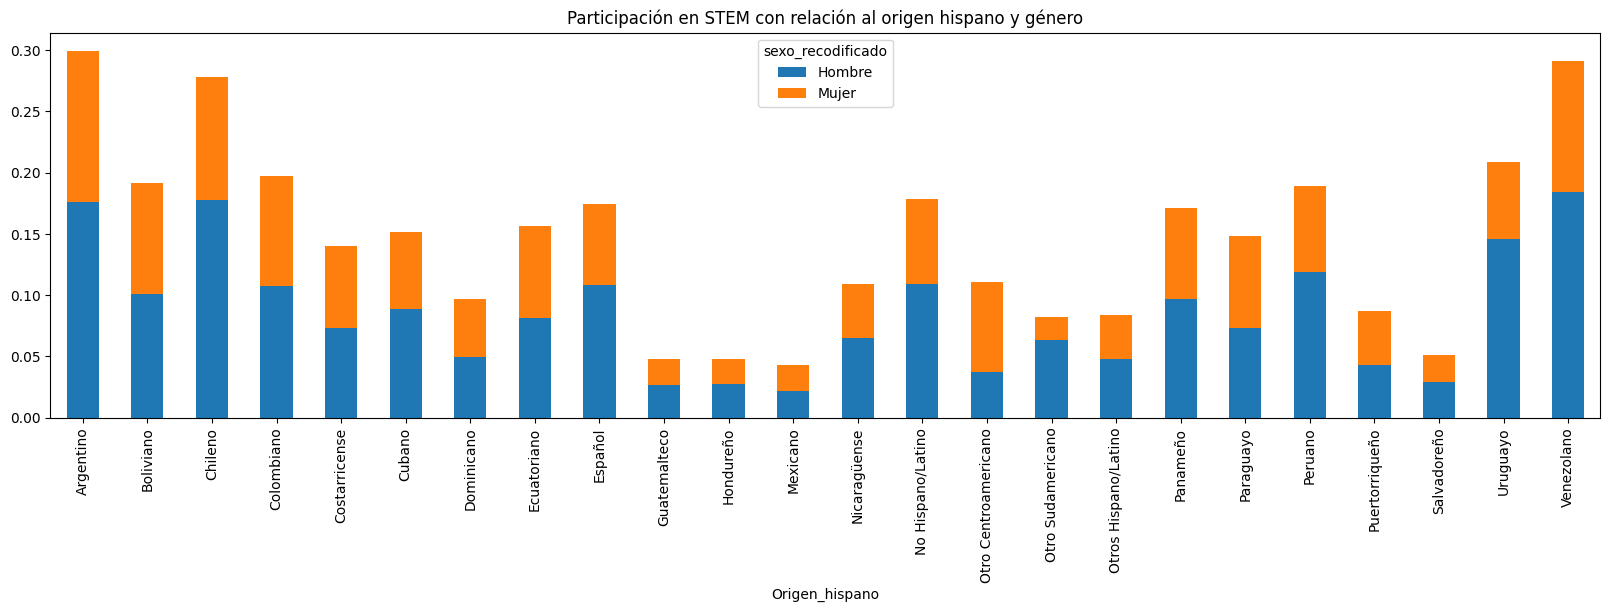

In [ ]:
#¿Cómo influye el origen hispano en la participación en carreras STEM?

#Analizaremos la participación en STEM en relación con el origen hispano.
#Mediremos la participación de diferentes grupos hispanos en carreras STEM, revelando patrones y tendencias significativas.

g1 = df_stem.pivot_table(index='origen_hispano',values='titulo_stem',columns="sexo_recodificado", aggfunc="mean")
g1.columns.name = "sexo_recodificado"
g1.index.name = 'Origen_hispano'
g1.plot.bar(title='Participación en STEM con relación al origen hispano y género', figsize=(20, 5), stacked=True)

En el anterior grafico se pueden realizar las siguientes observaciones:


*   Se observa una variación significativa en la participación entre diferentes orígenes hispanos. Algunos orígenes, como “Argentino” y “Venezolano”, muestran una mayor participación masculina en STEM. Para otros orígenes, como “Boliviano” o “Paraguayo”, la diferencia entre géneros no es tan pronunciada.

*   Las altura de las barras correspondientes a cada país o región de origen, se puede comparar la participación en STEM. Esto puede revelar patrones o tendencias específicas, como qué regiones tienen mayor o menor representación en estas áreas.


*  Si algunas barras son notablemente más altas o más bajas que otras, esto podría indicar áreas de oportunidad o desafíos particulares en la promoción de STEM entre ciertos grupos.

*   **Implicaciones Sociales:** La participación en STEM es un indicador importante del acceso a educación y oportunidades laborales en campos técnicos.



<Axes: title={'center': 'Porcentaje de población con títulos en STEM'}, xlabel='Edad'>

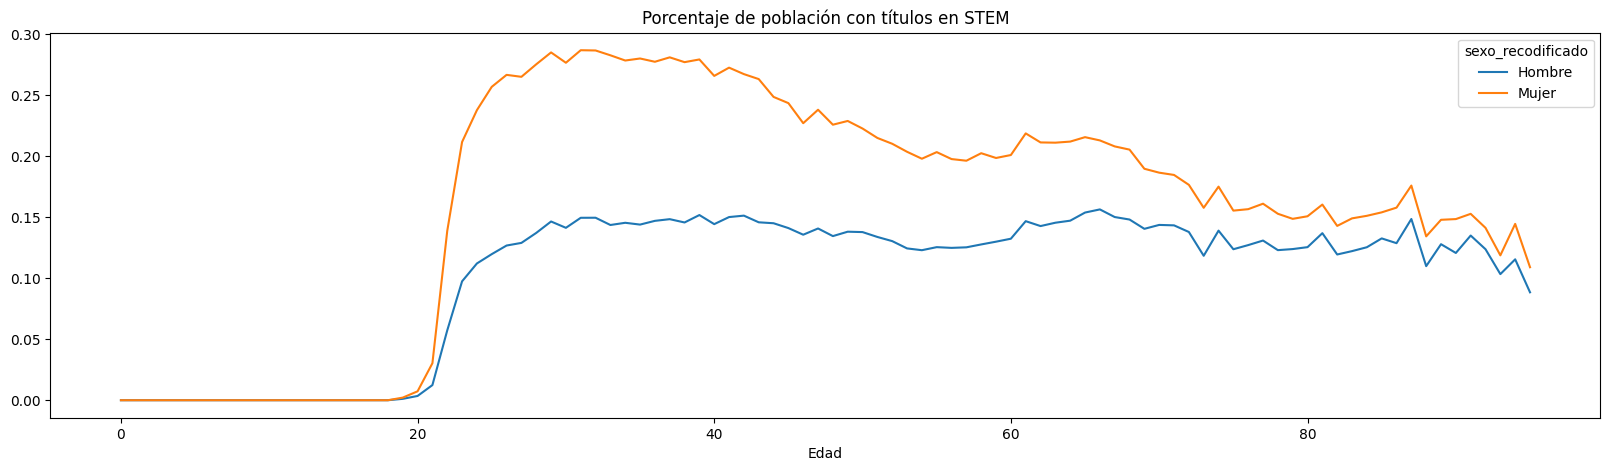

In [ ]:
# Gráfico de tasas de títulos en ciencias por edad y sexo

#Examinaremos la distribución de género en la participación hispana en carreras STEM.
#Identificaremos posibles desequilibrios de género entre hombres y mujeres en campos STEM, destacando disparidades.
p = df_stem.pivot_table(index='Edad',values='titulo_stem',columns="sexo_recodificado", aggfunc="mean")

p.columns.name = "sexo_recodificado"
p.index.name = 'Edad'
p.plot(title='Porcentaje de población con títulos en STEM', figsize=(20, 5), stacked=True)

En el anterior grafico se pueden realizar las siguientes observaciones:



*   La gráfica muestra una diferencia notable en la representación de género en STEM. El porcentaje de hombres con títulos en STEM es consistentemente más alto que el de las mujeres en todas las edades.

*   Ambas curvas muestran un aumento rápido hasta los 20 años, sin embargo, d de los 20 años, hay una disminución gradual, lo que podría indicar una disminución en la participación en la educación o en carreras en STEM.





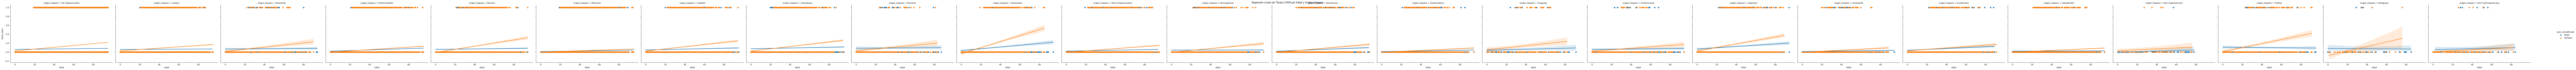

In [ ]:
# Crear el gráfico de regresión lineal
sns.lmplot(x='Edad', y='titulo_stem', hue='sexo_recodificado', col='origen_hispano', data=df_stem, aspect=1.5)

# Añadir título
plt.suptitle('Regresión Lineal de Títulos STEM por Edad y Origen Hispano')

# Mostrar el gráfico
plt.show()

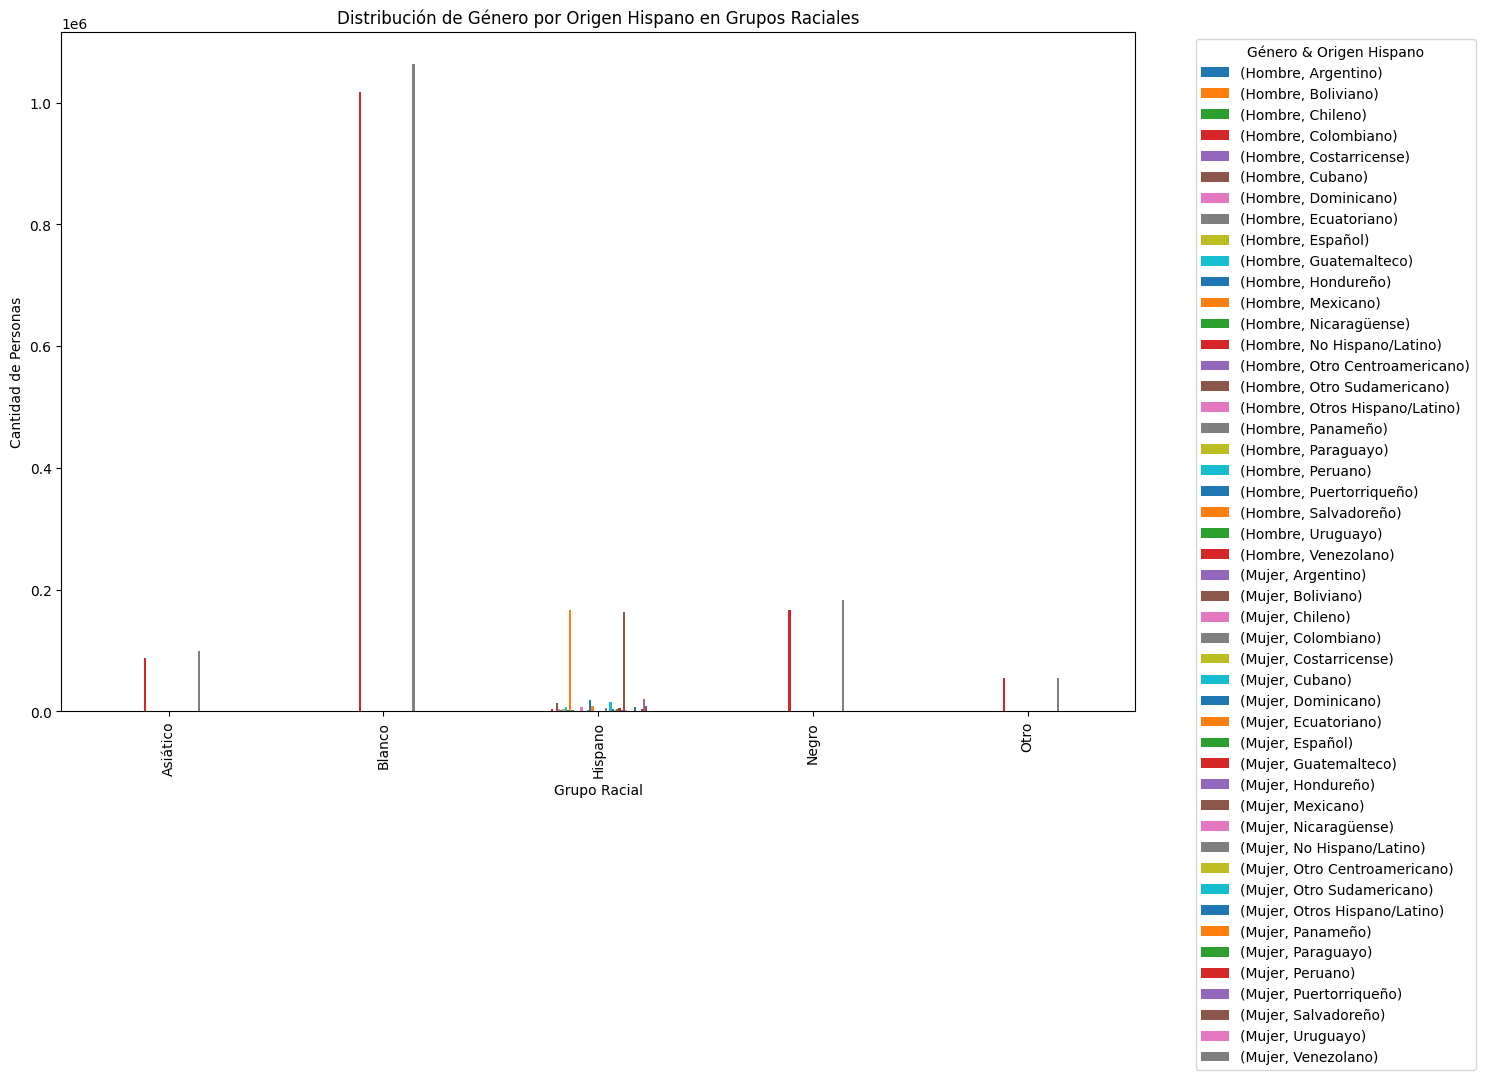

In [ ]:
#¿Se observan patrones significativos de inequidad de género en STEM en grupos raciales específicos?

#Investigaremos la existencia de patrones notables de inequidad de género en campos STEM dentro de grupos raciales específicos.
#Identificaremos posibles disparidades en la participación de hombres y mujeres en STEM en contextos raciales específicos.

# Crear tabla pivot para calcular la cantidad de personas por género y origen hispano en cada grupo racial
g5 = df_stem.pivot_table(index='raza_recodificada', columns=['sexo_recodificado', 'origen_hispano'], aggfunc='size')

# Crear el gráfico de barras agrupadas
ax = g5.plot(kind='bar', figsize=(15, 10))

# Añadir etiquetas y título
plt.xlabel('Grupo Racial')
plt.ylabel('Cantidad de Personas')
plt.title('Distribución de Género por Origen Hispano en Grupos Raciales')

# Mostrar el gráfico
plt.legend(title='Género & Origen Hispano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


En el anterior grafico se pueden realizar las siguientes observaciones:

* **Eje X (Horizontal):** Representa los diferentes grupos raciales. Algunos de ellos son “Asiático”, “Blanco”, “Negro”, “Indio” y “Otro”.
* **Eje Y (Vertical):** Representa la cantidad de personas en cada categoría.

* Las barras son coloreadas para representar diferentes orígenes hispanos y géneros; los hombres están marcados con tonos más oscuros mientras que las mujeres están en tonos más claros.

* La gráfica muestra una barra prominente en el grupo racial “Blanco”, indicando una alta cantidad de individuos en esta categoría. Las otras categorías, como “Afroamericano”, “Asiático”, “Indio Americano” y “Otro” tienen barras mucho más bajas, lo que indica una menor cantidad de individuos.


# Matriz de correlación

In [ ]:
df_stem.corr(method="pearson")
df_stem.corr()

<ipython-input-20-3af9520936bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_stem.corr(method="pearson")
<ipython-input-20-3af9520936bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_stem.corr()


,Edad,Género,titulo_stem,ocupacion_stem
Edad,1.000000,0.051853,0.096994,0.020800
Género,0.051853,1.000000,-0.061024,-0.062812
titulo_stem,0.096994,-0.061024,1.000000,0.189228
ocupacion_stem,0.020800,-0.062812,0.189228,1.000000


<ipython-input-21-cc377cf8c005>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_stem.corr(), vmin= -1, vmax= 1, annot= True)


<Axes: >

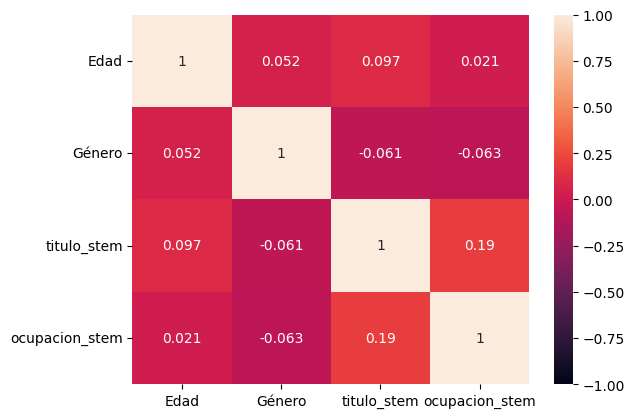

In [ ]:
# Hacemos un analisis de la correlacion de los datos para elegir un par de datos para un futuro modelo ML
sns.heatmap(df_stem.corr(), vmin= -1, vmax= 1, annot= True)

Con la anterior matriz de correlación se pueden realizar las siguientes observaciones:


1.  Variables Relacionadas:
   
    *   Las variables “Edad” y “título_stem” tienen una correlación positiva débil (valor de 0.097).

    *   Las variables “Género” y “ocupacion_stem” también tienen una correlación positiva débil (valor de 0.021).

2.  Variables No Relacionadas

    *   Las correlaciones entre “Edad” y “Género”, así como entre “título_stem” y “ocupacion_stem”, son muy bajas (valores cercanos a 0).

3. Conclusión:

    *   En general, no hay fuertes relaciones lineales entre estas variables en función de los valores de correlación.

<Axes: xlabel='ocupacion_stem', ylabel='titulo_stem'>

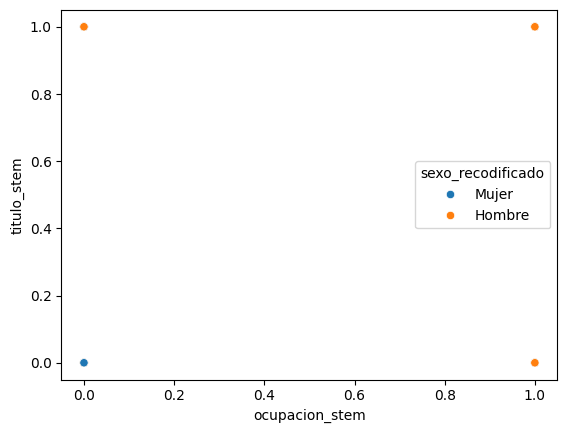

In [ ]:
sns.scatterplot(data= df_stem, x= 'ocupacion_stem', y= 'titulo_stem', hue="sexo_recodificado")

In [ ]:
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

In [ ]:
#Particionando en 60% entrenamiento, 10% validacion, 30% prueba
[x_train, x_val, x_test, y_train, y_val, y_test] =  particionar(df_stem[['ocupacion_stem', 'titulo_stem']], df_stem['sexo_recodificado'],0.60,0.10,0.30)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1936406, 2)
(322734, 2)
(968204, 2)


In [ ]:
#Particionando en 70% entrenamiento, 10% validacion, 20% prueba
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(df_stem[['ocupacion_stem', 'titulo_stem']], df_stem['sexo_recodificado'],0.70,0.10,0.20)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(2259140, 2)
(322734, 2)
(645470, 2)


# Sección nueva

A continuación, se tomaron datos del dataframe original para realizar una regresión logística.

*   Se crea un DataFrame llamado df_stem con datos proporcionados en el diccionario 'data'.
*   Se definen las columnas categoricas que se necesitan
*   Se utiliza pipeline para realizar el el procesamiento y modelado de los datos
* Se realiza el entremiento del modelo de regresión logistica
* Se realizan las predicciones y evalúa el rendimiento del modelo



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split #se utiliza para dividir los conjuntos de datos en dos partes, una para entrenar el modelo y la otra para probarlo
from sklearn.linear_model import LogisticRegression #es una implementación de la regresión logística, que es un algoritmo de clasificación
from sklearn.preprocessing import OneHotEncoder # se utiliza para convertir variables categóricas en una forma que pueda ser utilizada por los algoritmos de aprendizaje automático
from sklearn.compose import ColumnTransformer # permite aplicar diferentes transformaciones a diferentes columnas del conjunto de datos
from sklearn.pipeline import Pipeline #se utiliza para encadenar múltiples pasos de procesamiento y modelado en un solo estimador.
from sklearn.metrics import accuracy_score, classification_report #se utilizan para evaluar el rendimiento del modelo.

# Crear el DataFrame con los datos proporcionados
data = {
    'Edad': [19, 55, 56, 21, 21, 63, 61, 20, 12, 78, 81, 59, 56, 70, 71, 67, 72, 52, 18, 82],
    'Género': [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
    'sexo_recodificado': ['Mujer', 'Mujer', 'Hombre', 'Hombre', 'Mujer', 'Mujer', 'Mujer', 'Hombre', 'Hombre',
                           'Mujer', 'Mujer', 'Hombre', 'Mujer', 'Hombre', 'Mujer', 'Mujer', 'Hombre', 'Mujer', 'Mujer',
                           'Mujer'],
    'raza_recodificada': ['Blanco', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Otro', 'Otro', 'Otro', 'Negro',
                           'Blanco', 'Blanco', 'Blanco', 'Blanco', 'Blanco', 'Negro', 'Negro', 'Negro', 'Blanco',
                           'Blanco'],
    'origen_hispano': ['No Hispano/Latino'] * 20,
    'titulo_stem': [0.0] * 20,
    'ocupacion_stem': [0] * 20
}
df_stem = pd.DataFrame(data)

# Definir las columnas categóricas que necesitan ser codificadas
categorical_cols = ['sexo_recodificado', 'raza_recodificada', 'origen_hispano']

# Crear un transformador para codificar las columnas categóricas usando OneHotEncoder
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)],
                                remainder='passthrough')

# Crear el pipeline con el transformador y el clasificador de regresión logística
pipeline = Pipeline(steps=[('preprocessor', transformer),
                           ('classifier', LogisticRegression(random_state=42))])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_stem.drop('Género', axis=1)  # Características
y = df_stem['Género']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy:.2f}')

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))



Exactitud: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [ ]:
print(df_stem.columns)

Index(['Edad', 'Género', 'sexo_recodificado', 'raza_recodificada',
       'origen_hispano', 'titulo_stem', 'ocupacion_stem'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score #cross_val_score: evalúa un modelo utilizando validación cruzada.
#La validación cruzada es una técnica que permite obtener una medida más precisa del rendimiento del modelo
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer #permite aplicar diferentes transformaciones a diferentes columnas del conjunto de datos
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report # Estas funciones se utilizan para evaluar el rendimiento del modelo.


# Definir las columnas categóricas que necesitan ser codificadas
categorical_cols = ['sexo_recodificado', 'raza_recodificada', 'origen_hispano']

# Crear un transformador para codificar las columnas categóricas usando OneHotEncoder
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)],
                                remainder='passthrough')

# Crear el pipeline con el transformador y el clasificador de regresión logística
pipeline = Pipeline(steps=[('preprocessor', transformer),
                           ('classifier', LogisticRegression(random_state=42))])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_stem.drop('Género', axis=1)  # Características
y = df_stem['Género']  # Variable objetivo

# Realizar validación cruzada
cv_scores = cross_val_score(pipeline, X, y, cv=5)  # 5-fold cross-validation

# Imprimir los puntajes de validación cruzada
print('Puntuaciones de validación cruzada:', cv_scores)
print('Precisión CV media:', cv_scores.mean())


Puntuaciones de validación cruzada: [1.  1.  1.  1.  0.5]
Precisión CV media: 0.9


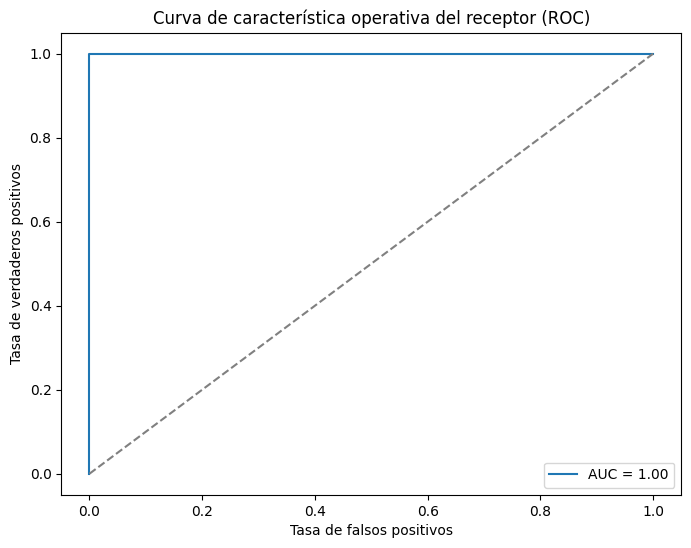

AUC: 1.00


In [ ]:
from sklearn.preprocessing import OneHotEncoder #se utiliza para convertir variables categóricas en una forma que pueda ser utilizada por los algoritmos de aprendizaje automático
from sklearn.compose import ColumnTransformer # permite aplicar diferentes transformaciones a diferentes columnas del conjunto de datos
from sklearn.pipeline import Pipeline # se utiliza para encadenar múltiples pasos de procesamiento y modelado en un solo estimador
from sklearn.linear_model import LogisticRegression #  es una implementación de la regresión logística, que es un algoritmo de clasificación.
from sklearn.model_selection import train_test_split, cross_val_predict #  se utiliza para dividir los conjuntos de datos en dos partes, una para entrenar el modelo y la otra para probarlo
from sklearn.metrics import roc_curve, auc #se utilizan para calcular y visualizar la curva ROC (Receiver Operating Characteristic) y el área bajo la curva (AUC), respectivamente
import matplotlib.pyplot as plt #Biblioteca para visualizaciones

# Definir las columnas categóricas que necesitan ser codificadas
categorical_cols = ['sexo_recodificado', 'raza_recodificada', 'origen_hispano']

# Crear un transformador para codificar las columnas categóricas usando OneHotEncoder
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)],
                                remainder='passthrough')

# Crear el pipeline con el transformador y el clasificador de regresión logística
pipeline = Pipeline(steps=[('preprocessor', transformer),
                           ('classifier', LogisticRegression(random_state=42))])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_stem.drop('Género', axis=1)  # Características
y = df_stem['Género']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Calcular la curva ROC y el AUC con validación cruzada
y_probas = cross_val_predict(pipeline, X, y, cv=5, method='predict_proba')
fpr, tpr, thresholds = roc_curve(y, y_probas[:, 1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva de característica operativa del receptor (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.2f}')


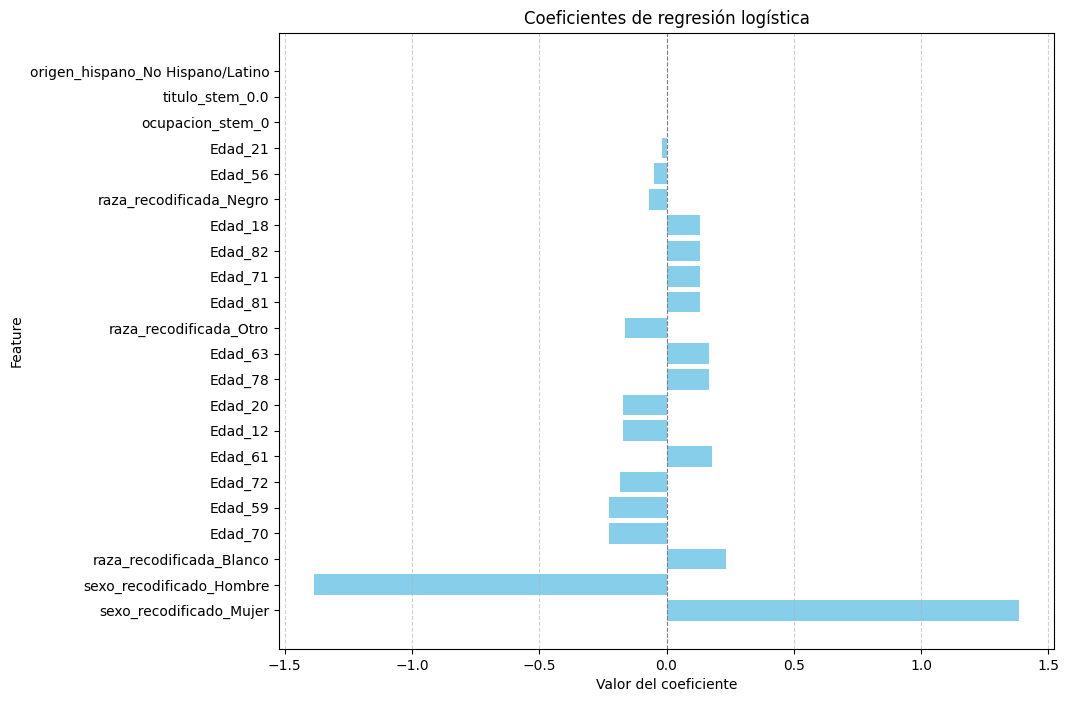

In [ ]:
from sklearn.model_selection import cross_val_predict #se utiliza para generar predicciones de validación cruzada para cada elemento de entrada

# Definir las columnas categóricas que necesitan ser codificadas
categorical_cols = ['sexo_recodificado', 'raza_recodificada', 'origen_hispano', 'titulo_stem', 'ocupacion_stem', 'Edad']

# Crear un transformador para codificar las columnas categóricas usando OneHotEncoder
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)],
                                remainder='passthrough')

# Aplicar el transformador a los datos de entrenamiento
X_train_encoded = transformer.fit_transform(X_train)

# Crear un modelo de regresión logística
model = LogisticRegression()

# Realizar la validación cruzada para obtener las predicciones de probabilidad
y_probas = cross_val_predict(model, X_train_encoded, y_train, cv=5, method='predict_proba')

# Entrenar el modelo con todos los datos de entrenamiento
model.fit(X_train_encoded, y_train)

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]
features = list(transformer.transformers_[0][1].get_feature_names_out()) + list(X_train.columns[len(categorical_cols):])
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Ordenar los coeficientes por valor absoluto
coeff_df['Abs_Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df_sorted = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
plt.barh(coeff_df_sorted['Feature'], coeff_df_sorted['Coefficient'], color='skyblue')
plt.xlabel('Valor del coeficiente')
plt.ylabel('Feature')
plt.title('Coeficientes de regresión logística')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)  # Linea vertical en 0
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()